# WORKING WITH UNSUPERVISED LEARNING

    - FIRST ALGORITHM WE WORK WITH IS K MEANS ALGORITHM 

        - THE ALGORITHM WORKS ON THE LOGIC OF DECIDING THE NO. OF GROUPS WE HAVE TO DECIDE THE DATASET INTO AND THEN WORK WITH THE CENTROIDS OF EACH OF THE GROUP 
        - LOW INERTIA & LOW NO. OF GROUPS; INERTIA REFERS TO WITHIN CLUSTER SUM OF SQUARES !!!
        - ELBOW METH0D GIVES US THE OPTIMAL NO.OF GROUPS 

In [1]:
# IMPORTING STANDARD LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# READING THE DATASET 

data = pd.read_csv('dataset.csv')

print(data.shape)
print(data.head(5))

print(data.describe())


(303, 2)
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000


In [3]:
# SO THIS IS A LABELLED DATASET WE CONVERT IT TO AN UNLABELLED DATASET SO WE CAN USE OUR UNSUPERVISED ML ALGO!!!

Income = data['INCOME'].values
Spend = data['SPEND'].values

X = np.array(list(zip(Income, Spend)))

print(X)

[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]
 [239 160]
 [275 139]
 [266 171]
 [211 144]
 [283 162]
 [219 158]
 [340 172]
 [226 114]
 [247 171]
 [239 151]
 [234 161]
 [233 179]
 [226 178]
 [243 137]
 [199 178]
 [302 162]
 [212 157]
 [175 123]
 [417 157]
 [197 152]
 [198 168]
 [177 140]
 [219 188]
 [273 152]
 [213 125]
 [177 160]
 [304 170]
 [232 165]
 [269 148]
 [360 151]
 [308 142]
 [245 180]
 [208 148]
 [264 143]
 [321 182]
 [325 172]
 [235 180]
 [257 156]
 [216 115]
 [234 160]
 [256 149]
 [302 151]
 [231 146]
 [141 175]
 [252 172]
 [201 158]
 [222 186]
 [260 185]
 [182 174]
 [303 159]
 [265 130]
 [309 156]
 [186 190]
 [203 132]
 [211 165]
 [183 182]
 [222 143]
 [234 175]
 [220 170]
 [209 163]
 [258 147]
 [227 154]
 [204 202]
 [261 186]
 [213 165]
 [250 161]
 [245 166]
 [221 164]
 [205 184]
 [240 154]
 [250 179]
 [308 170]
 [318 160]
 [298 178]
 [265 122]
 [264 160]
 [277 151]
 [197 156]
 [214 158]
 [248 122]
 [255 175]

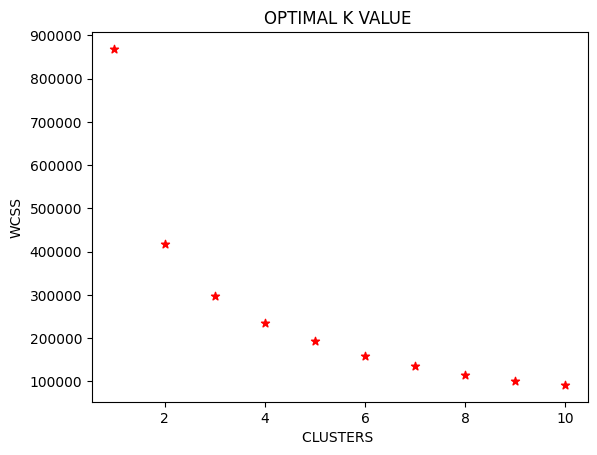

In [11]:
# DECIDING ON THE OPTIMIZED K VALUES FOR OUR DATASET 

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(X)
    wcss.append(model.inertia_)

plt.scatter(range(1,11), wcss, color='red', marker='*')

plt.title('OPTIMAL K VALUE ')
plt.xlabel('CLUSTERS ')
plt.ylabel('WCSS')

plt.show()

In [15]:
# FROM THE ELBOW METHOD THE VALUE OF NO. OF CLUSTERS IS DECIDED BASED UPON WHERE THE RATE OF WCSS STARTS TO DECREASE !!!

# I DECIDE ON THE VALUE TO BE 4 !!

# FITTING THE MODEL 

model = KMeans(n_clusters=4, n_init=10)

y_means = model.fit_predict(X)

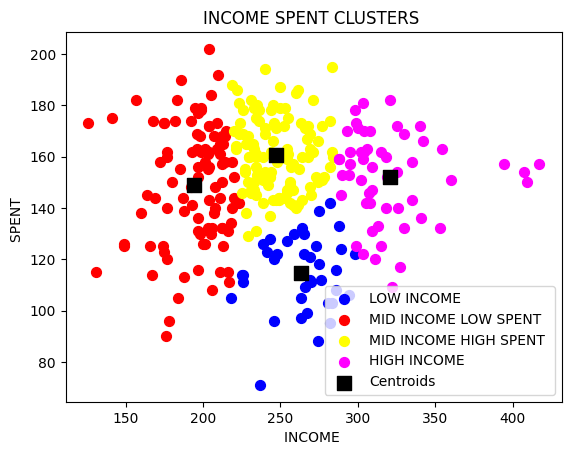

In [18]:
# VISUALIZATIONS 

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='blue',label='LOW INCOME ')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='red',label='MID INCOME LOW SPENT ')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='yellow',label='MID INCOME HIGH SPENT ')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='magenta',label='HIGH INCOME ')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='black', label='Centroids')
plt.title('INCOME SPENT CLUSTERS ')
plt.xlabel('INCOME ')
plt.ylabel('SPENT ')
plt.legend()
plt.show()